# Welcome to my basic data cleaning tutorial

First we have to import the packages we want to use

In [1]:
import pandas as pd
import numpy as np

Next we want to read our data using the read_csv function from pandas, from there we can then use functions liek data.shape or data.columns to start observing the data before we clean it

In [2]:
data = pd.read_csv("AboutUS.csv")
print(data.shape)
print(data.columns)
data.head()

(34, 24)
Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q1', 'Q2', 'Q3', 'Q5', 'Q6',
       'Q7', 'Q8'],
      dtype='object')


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,LocationLongitude,DistributionChannel,UserLanguage,Q1,Q2,Q3,Q5,Q6,Q7,Q8
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Location Longitude,Distribution Channel,User Language,Name,Favorite Number,Pet?,Type of Pet?,Graduation Date?,Class Year,Height in Feet?
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""locationLongitude""}","{""ImportId"":""distributionChannel""}","{""ImportId"":""userLanguage""}","{""ImportId"":""QID1_TEXT""}","{""ImportId"":""QID2_TEXT""}","{""ImportId"":""QID3""}","{""ImportId"":""QID5""}","{""ImportId"":""QID6_TEXT""}","{""ImportId"":""QID7""}","{""ImportId"":""QID8_TEXT""}"
2,9/7/2022 9:56,9/7/2022 9:56,Survey Preview,NaN,100,36,TRUE,9/7/2022 9:56,R_xbCNFvqELOkowBb,NaN,...,-71.4377,preview,EN,Testing,NaN,NaN,NaN,NaN,NaN,NaN
3,9/7/2022 10:00,9/7/2022 10:00,IP Address,66.206.141.233,100,8,TRUE,9/7/2022 10:00,R_2v2hRGihWJfgaSi,NaN,...,-71.4377,anonymous,EN,Testing2,NaN,NaN,NaN,NaN,NaN,NaN
4,9/7/2022 10:01,9/7/2022 10:01,IP Address,66.206.141.233,100,9,TRUE,9/7/2022 10:01,R_cTsCAySSD3Kb5zb,NaN,...,-71.4377,anonymous,EN,Testing3,3,NaN,NaN,NaN,NaN,NaN


After we look at the data we then want to make sure we are only looking at the rows and columns of data that we want to see.
Here we are removing the columns we dont need so that we can focus on the data that is importat to us

In [3]:
data = data[['Duration (in seconds)', 'RecordedDate', 'Q1', 'Q2', 'Q3', 'Q5', 'Q6','Q7', 'Q8']]
print(data.shape)
data.head()

(34, 9)


,Duration (in seconds),RecordedDate,Q1,Q2,Q3,Q5,Q6,Q7,Q8
0,Duration (in seconds),Recorded Date,Name,Favorite Number,Pet?,Type of Pet?,Graduation Date?,Class Year,Height in Feet?
1,"{""ImportId"":""duration""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""QID1_TEXT""}","{""ImportId"":""QID2_TEXT""}","{""ImportId"":""QID3""}","{""ImportId"":""QID5""}","{""ImportId"":""QID6_TEXT""}","{""ImportId"":""QID7""}","{""ImportId"":""QID8_TEXT""}"
2,36,9/7/2022 9:56,Testing,NaN,NaN,NaN,NaN,NaN,NaN
3,8,9/7/2022 10:00,Testing2,NaN,NaN,NaN,NaN,NaN,NaN
4,9,9/7/2022 10:01,Testing3,3,NaN,NaN,NaN,NaN,NaN


After this we do the same thing but with rows. In this case we use row index as opposed to the column name liek we did when we dropped columns

In [4]:
data2 = data.drop([0,1,2,3,4,9])
data2.head()

,Duration (in seconds),RecordedDate,Q1,Q2,Q3,Q5,Q6,Q7,Q8
5,30,9/7/2022 10:18,Emma Pedolzky,13,Yes,Dog,May-25,Second year,5 ft 8 in
6,51,9/7/2022 10:19,Emma Pedolzky,13,Yes,Dog,May-25,Second year,5ft 8in
7,91,9/7/2022 11:01,Norberto Alvarado III,6,Yes,Dog,May-23,Fourth year,5'7
8,286,9/7/2022 11:02,Trevor Christensen,3,Yes,Dog,May-25,Second year,5'9''
10,59,9/7/2022 11:03,Nick,9,Yes,"Dog,Cat,Reptile",May-23,Fourth year,6


As we can see here we continue to get rid of rows by using the drop_duplicates function because we know that everyone should have only responded to the survey once

In [5]:
print(data2.shape)
data3 = data2.drop_duplicates(subset=['Q1'], keep = 'last')
print(data3.shape)
#df.drop_duplicates(subset=['brand'])

(28, 9)
(25, 9)


The next five code blocks are continuously getting rid of the duplicate rows and strippling the white spaces before and after the names

In [64]:
data3.head()

,Duration (in seconds),RecordedDate,Q1,Q2,Q3,Q5,Q6,Q7,Q8
6,51,9/7/2022 10:19,Emma Pedolzky,13,Yes,Dog,May-25,Second year,5ft 8in
7,91,9/7/2022 11:01,Norberto Alvarado III,6,Yes,Dog,May-23,Fourth year,5'7
8,286,9/7/2022 11:02,Trevor Christensen,3,Yes,Dog,May-25,Second year,5'9''
10,59,9/7/2022 11:03,Nick,9,Yes,"Dog,Cat,Reptile",May-23,Fourth year,6
11,231,9/7/2022 11:23,Renee Delos,11,Yes,Dog,2024,Third year,5.66 ft


In [7]:
data3["Q1"][5]

'Emma Pedolzky '

In [8]:
data3["Q1"][6]

'Emma Pedolzky  '

In [9]:
newnames = []
for name in data3["Q1"]:
    newnames.append(name.strip())
print(newnames)

['Emma Pedolzky', 'Emma Pedolzky', 'Norberto Alvarado III', 'Trevor Christensen', 'Nick', 'Renee Delos', 'Katelyn Muia', 'Darya Bankouskaya', 'Griffin', 'Reese Stevenson', 'Jack Sweeney', 'Peter Sullivan', 'Ian James Carpenter', 'Luke Walsh', 'Adam', 'Jon Riordan', 'ML Tlachac', 'Luke Lamontagne', 'Ganesh Thammana', 'Thomas', 'Fadi Oumera', 'Trevor Francis', 'Natalia Kuipers', 'Matthew Bilan', 'Luis']


In [10]:
data3["Q1"] = newnames
data3.head()

C:\Users\student\AppData\Local\Temp\ipykernel_7996\1005319741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["Q1"] = newnames


,Duration (in seconds),RecordedDate,Q1,Q2,Q3,Q5,Q6,Q7,Q8
5,30,9/7/2022 10:18,Emma Pedolzky,13,Yes,Dog,May-25,Second year,5 ft 8 in
6,51,9/7/2022 10:19,Emma Pedolzky,13,Yes,Dog,May-25,Second year,5ft 8in
7,91,9/7/2022 11:01,Norberto Alvarado III,6,Yes,Dog,May-23,Fourth year,5'7
8,286,9/7/2022 11:02,Trevor Christensen,3,Yes,Dog,May-25,Second year,5'9''
10,59,9/7/2022 11:03,Nick,9,Yes,"Dog,Cat,Reptile",May-23,Fourth year,6


In [11]:
print(data3.shape)
data3 = data3.drop_duplicates(subset=['Q1'], keep = 'last')
print(data3.shape)

(25, 9)
(24, 9)


In [12]:
data3.head()

,Duration (in seconds),RecordedDate,Q1,Q2,Q3,Q5,Q6,Q7,Q8
6,51,9/7/2022 10:19,Emma Pedolzky,13,Yes,Dog,May-25,Second year,5ft 8in
7,91,9/7/2022 11:01,Norberto Alvarado III,6,Yes,Dog,May-23,Fourth year,5'7
8,286,9/7/2022 11:02,Trevor Christensen,3,Yes,Dog,May-25,Second year,5'9''
10,59,9/7/2022 11:03,Nick,9,Yes,"Dog,Cat,Reptile",May-23,Fourth year,6
11,231,9/7/2022 11:23,Renee Delos,11,Yes,Dog,2024,Third year,5.66 ft


After we remove necessary rows and columns, we should reset the index for our dataset. This is important becuase it makes it a lot easier for us to work with our data.

In [13]:
df = data3.reset_index(drop = True)
df.head()

,Duration (in seconds),RecordedDate,Q1,Q2,Q3,Q5,Q6,Q7,Q8
0,51,9/7/2022 10:19,Emma Pedolzky,13,Yes,Dog,May-25,Second year,5ft 8in
1,91,9/7/2022 11:01,Norberto Alvarado III,6,Yes,Dog,May-23,Fourth year,5'7
2,286,9/7/2022 11:02,Trevor Christensen,3,Yes,Dog,May-25,Second year,5'9''
3,59,9/7/2022 11:03,Nick,9,Yes,"Dog,Cat,Reptile",May-23,Fourth year,6
4,231,9/7/2022 11:23,Renee Delos,11,Yes,Dog,2024,Third year,5.66 ft


Next after working on our data we should probably save it so we don't lose progress ;) (next two code blocks i saved it as two different things for a reason)

In [15]:
df.to_csv('AboutUsWorking.csv', index = False)

In [16]:

data = pd.read_csv('AboutUsWorking.csv')
datacleaning = pd.read_csv('AboutUsWorking.csv')
data.head()
datacleaning.head()

,Duration (in seconds),RecordedDate,Q1,Q2,Q3,Q5,Q6,Q7,Q8
0,51,9/7/2022 10:19,Emma Pedolzky,13,Yes,Dog,May-25,Second year,5ft 8in
1,91,9/7/2022 11:01,Norberto Alvarado III,6,Yes,Dog,May-23,Fourth year,5'7
2,286,9/7/2022 11:02,Trevor Christensen,3,Yes,Dog,May-25,Second year,5'9''
3,59,9/7/2022 11:03,Nick,9,Yes,"Dog,Cat,Reptile",May-23,Fourth year,6
4,231,9/7/2022 11:23,Renee Delos,11,Yes,Dog,2024,Third year,5.66 ft


After we save the data, we will continue to clean it up until it looks better. The first thing I did here is chnage the names of the columns to make the table of data easier to read

In [17]:
data.columns = ['duration', 'date', 'name', 'favoriteNumber', 'animal', 'animalType', 'graduationDate', 'year', 'height']
data.head()

,duration,date,name,favoriteNumber,animal,animalType,graduationDate,year,height
0,51,9/7/2022 10:19,Emma Pedolzky,13,Yes,Dog,May-25,Second year,5ft 8in
1,91,9/7/2022 11:01,Norberto Alvarado III,6,Yes,Dog,May-23,Fourth year,5'7
2,286,9/7/2022 11:02,Trevor Christensen,3,Yes,Dog,May-25,Second year,5'9''
3,59,9/7/2022 11:03,Nick,9,Yes,"Dog,Cat,Reptile",May-23,Fourth year,6
4,231,9/7/2022 11:23,Renee Delos,11,Yes,Dog,2024,Third year,5.66 ft


In [18]:
datacleaning.columns = ['duration', 'date', 'name', 'favoriteNumber', 'animal', 'animalType', 'graduationDate', 'year', 'height']
datacleaning.head()

,duration,date,name,favoriteNumber,animal,animalType,graduationDate,year,height
0,51,9/7/2022 10:19,Emma Pedolzky,13,Yes,Dog,May-25,Second year,5ft 8in
1,91,9/7/2022 11:01,Norberto Alvarado III,6,Yes,Dog,May-23,Fourth year,5'7
2,286,9/7/2022 11:02,Trevor Christensen,3,Yes,Dog,May-25,Second year,5'9''
3,59,9/7/2022 11:03,Nick,9,Yes,"Dog,Cat,Reptile",May-23,Fourth year,6
4,231,9/7/2022 11:23,Renee Delos,11,Yes,Dog,2024,Third year,5.66 ft


Remember when I mentioned I saved it as two different things. This was to show you two different solutions for one-hot endcoding. This method of coding allows us to create two or more new columsn in order to make the dataset cleaner. For the animalType column we used one-hot encoding to split the different types of animals that each person has and create a new column for each one using a 1 or 0 to show whether someone has that type of animal as a pet.

In [19]:
#one-hot_encoding method 1
dog = []
cat = []

for animals in datacleaning.animalType: 
    if type(animals) == str:
        a = animals.split(',')
        if "Dog" in a:
            dog.append(1)
        else:
            dog.append(0)
    else:
        dog.append(0)

for animals in datacleaning.animalType:
    if type(animals) == str:
        a = animals.split('.')
        if'Cat' in a:
            cat.append(1)
        else:
            cat.append(0)    
    else:
        cat.append(0)

In [20]:
print(len(dog))
print(len(cat))
print(len(datacleaning.animalType))

24
24
24


In [21]:
#one-hot_encoding method 2

dog = []
cat = []

for animals in data.animalType: 
    if type(animals) == str:
        a = animals.split(',')
        #print(a)
        if 'Dog' in a:
            if 'Cat' in a:
                dog.append(1)
                cat.append(1)
            else:
                dog.append(1)
                cat.append(0)
        elif 'Cat' in a:
            cat.append(1)
            dog.append(0)
        else:
            dog.append(0)
            cat.append(0)

    else:
        dog.append(0)
        cat.append(0)
        

In [22]:
print(len(dog))
print(len(cat))
print(len(data.animalType))

24
24
24


After we created the new columns we then have to add them to the data set and remove the old column that we used to create them. We remove animal type after creating the columns called cat and dog

In [23]:
data['dog'] = dog
data['cat'] = cat
data = data.drop(columns = ['animalType'])
data.head()

,duration,date,name,favoriteNumber,animal,graduationDate,year,height,dog,cat
0,51,9/7/2022 10:19,Emma Pedolzky,13,Yes,May-25,Second year,5ft 8in,1,0
1,91,9/7/2022 11:01,Norberto Alvarado III,6,Yes,May-23,Fourth year,5'7,1,0
2,286,9/7/2022 11:02,Trevor Christensen,3,Yes,May-25,Second year,5'9'',1,0
3,59,9/7/2022 11:03,Nick,9,Yes,May-23,Fourth year,6,1,1
4,231,9/7/2022 11:23,Renee Delos,11,Yes,2024,Third year,5.66 ft,1,0


Next we created a new column for graduation date where we jsut used the year instead of the month and year. (next five blocks)

In [24]:
print(set(data['graduationDate']))

{'5/22/2024', '2025', 'May-23', ' Spring 2025', 'May-25', '2023', 'May-24', '2022', '2024'}


In [25]:
year = []
for date in data['graduationDate']:
     year.append(int( '20' + date[-2:]))
    
data['graduationYear'] = year
data.head()

,duration,date,name,favoriteNumber,animal,graduationDate,year,height,dog,cat,graduationYear
0,51,9/7/2022 10:19,Emma Pedolzky,13,Yes,May-25,Second year,5ft 8in,1,0,2025
1,91,9/7/2022 11:01,Norberto Alvarado III,6,Yes,May-23,Fourth year,5'7,1,0,2023
2,286,9/7/2022 11:02,Trevor Christensen,3,Yes,May-25,Second year,5'9'',1,0,2025
3,59,9/7/2022 11:03,Nick,9,Yes,May-23,Fourth year,6,1,1,2023
4,231,9/7/2022 11:23,Renee Delos,11,Yes,2024,Third year,5.66 ft,1,0,2024


In [26]:
print(set(data['graduationYear']))
print(type(data['graduationYear'][0]))

{2024, 2025, 2022, 2023}
<class 'numpy.int64'>


In [27]:
data.sort_values(by = ['graduationYear'], ascending = True)

,duration,date,name,favoriteNumber,animal,graduationDate,year,height,dog,cat,graduationYear
15,20,9/8/2022 16:39,ML Tlachac,6,Yes,2022,NaN,5.5,1,0,2022
1,91,9/7/2022 11:01,Norberto Alvarado III,6,Yes,May-23,Fourth year,5'7,1,0,2023
3,59,9/7/2022 11:03,Nick,9,Yes,May-23,Fourth year,6,1,1,2023
14,36,9/8/2022 14:29,Jon Riordan,5,Yes,May-23,Fourth year,6'2,1,0,2023
13,36,9/8/2022 14:19,Adam,2,Yes,May-23,Fourth year,6,1,0,2023
19,25,9/9/2022 6:57,Fadi Oumera,7,No,May-23,Fifth year,6'1,0,0,2023
10,46,9/8/2022 11:28,Peter Sullivan,22,Yes,2023,Fourth year,"5'10""",1,0,2023
23,26,9/9/2022 7:02,Luis,11,No,2024,Third year,5'9'',0,0,2024
22,41,9/9/2022 7:00,Matthew Bilan,33,Yes,2024,Third year,5'11'',1,0,2024
8,30,9/8/2022 9:04,Reese Stevenson,343,Yes,May-24,Third year,5.11,1,1,2024


In [66]:
data2 = data.drop(columns = ['graduationDate'])
data2.head()

,duration,date,name,favoriteNumber,animal,year,height,dog,cat,graduationYear
0,51,9/7/2022 10:19,Emma Pedolzky,13,Yes,Second year,5ft 8in,1,0,2025
1,91,9/7/2022 11:01,Norberto Alvarado III,6,Yes,Fourth year,5'7,1,0,2023
2,286,9/7/2022 11:02,Trevor Christensen,3,Yes,Second year,5'9'',1,0,2025
3,59,9/7/2022 11:03,Nick,9,Yes,Fourth year,6,1,1,2023
4,231,9/7/2022 11:23,Renee Delos,11,Yes,Third year,5.66 ft,1,0,2024


Next I used 10min to pandas to find a way to look at the data in just one column, the height column. This worked just as i intended it to as 10min to pandas did a good job of showing what it would look like

In [29]:
#from 10min to pandas, worked as intended
data2.loc[0:,'height'].head(10)

0    5ft 8in
1        5'7
2      5'9''
3          6
4    5.66 ft
5        5.1
6      5'8''
7       5'5"
8       5.11
9          6
Name: height, dtype: object

I then (after a long time :O) created a new column for the height based on the where a person height fell. Ex. i am 5ft 5in my height is in the 5ft range. (Next 2 blocks)

In [49]:
heightfeet = []

for height in data.height: 
    if type(height) == str:
        if height.find('5') == 0: 
            heightfeet.append(5)    
        else:
            heightfeet.append(6)
    else:
        heightfeet.append(0)
len(heightfeet)
#print(heightfeet)        

        

24

In [68]:
data2['HeightRangeFt'] = heightfeet
data2.head()

,duration,date,name,favoriteNumber,animal,year,height,dog,cat,graduationYear,HeightRangeFt
0,51,9/7/2022 10:19,Emma Pedolzky,13,Yes,Second year,5ft 8in,1,0,2025,5
1,91,9/7/2022 11:01,Norberto Alvarado III,6,Yes,Fourth year,5'7,1,0,2023,5
2,286,9/7/2022 11:02,Trevor Christensen,3,Yes,Second year,5'9'',1,0,2025,5
3,59,9/7/2022 11:03,Nick,9,Yes,Fourth year,6,1,1,2023,6
4,231,9/7/2022 11:23,Renee Delos,11,Yes,Third year,5.66 ft,1,0,2024,5


Then I viewed the dataset again and then pulled my name out of the cleaned data set(next two blocks)

In [69]:
data2.head()

,duration,date,name,favoriteNumber,animal,year,height,dog,cat,graduationYear,HeightRangeFt
0,51,9/7/2022 10:19,Emma Pedolzky,13,Yes,Second year,5ft 8in,1,0,2025,5
1,91,9/7/2022 11:01,Norberto Alvarado III,6,Yes,Fourth year,5'7,1,0,2023,5
2,286,9/7/2022 11:02,Trevor Christensen,3,Yes,Second year,5'9'',1,0,2025,5
3,59,9/7/2022 11:03,Nick,9,Yes,Fourth year,6,1,1,2023,6
4,231,9/7/2022 11:23,Renee Delos,11,Yes,Third year,5.66 ft,1,0,2024,5


In [55]:
 data2['name'][7]

'Griffin'

Lastly I improrted another package call matplotlib and created a graph with the data showing graduation year on the X axis and total duration on the Y axis.

<BarContainer object of 24 artists>

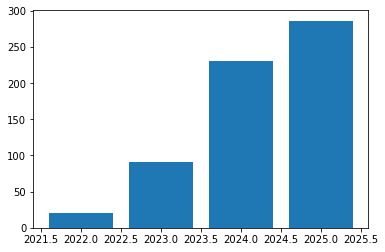

In [70]:
import matplotlib.pyplot as plt
plt.bar(data2.graduationYear, data2.duration)